# Finding positions of each standard star

In [23]:
import pandas as pd
import numpy as np
from astropy.visualization import astropy_mpl_style, quantity_support
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time
import matplotlib.pyplot as plt
from astropy.coordinates import get_moon
astropy_mpl_style['axes.grid'] = False
plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x251a6627fa0>

In [24]:
#Displaying data
data = pd.read_csv("landolt_north.csv", delimiter = "|")
data

,oid,Identifier,ra,dec
0,2649925,BD+00 3384,234.580816,0.134701
1,7790,BD+44 156,11.392069,45.613391
2,7791,BD+44 157,11.426887,45.587618
3,595354,BD+44 1898,145.743663,43.834707
4,595358,BD+44 1904,146.840482,44.237212
...,...,...,...,...
345,9221724,UCAC4 789-005539,27.649725,67.732709
346,9221725,UCAC4 789-005569,27.880952,67.710833
347,538176,V* ER UMa,146.799754,51.902486
348,2923595,V* V648 Lyr,275.939495,41.096635


In [25]:
#Position of the BPO
latitude = 51.37283*u.deg 
longitude = -2.319209*u.deg
elevation = 190.0*u.m

In [26]:
# Set location
bath = EarthLocation(lat = latitude, lon = longitude, height = elevation)
# Input time year-month-day
time = Time('2023-3-5 22:00:00')

In [27]:
# Find information about the two variable stars - RZ Ceph and RV UMa
#RZ Ceph first:
v1 = SkyCoord('22h40m0.51s', '+64d58m45.0s', frame = 'icrs')
#Transform coordinates
caltaz = v1.transform_to(AltAz(obstime=time,location=bath))
print(f"RZ Cep's Altitude = {caltaz.alt:.2}")
print(f"RZ Cep's Azimuthal = {caltaz.az:.2}")

# RV UMa: 
v2 = SkyCoord('13h34m12.58s', '+53d52m7.9s')
# Transform coordinates
daltaz = v2.transform_to(AltAz(obstime=time,location=bath))
print(f"RV UMa's Altitude = {daltaz.alt:.2}")
print(f"RV UMa's Azimuthal = {daltaz.az:.2}")

RZ Cep's Altitude = 2.9e+01 deg
RZ Cep's Azimuthal = 3.5e+02 deg
RV UMa's Altitude = 4.8e+01 deg
RV UMa's Azimuthal = 5.7e+01 deg


In [28]:
#Remove whitespace from column heads - was formatted weirdly
data.columns = data.columns.str.strip()
data.columns

Index(['oid', 'Identifier', 'ra', 'dec'], dtype='object')

In [29]:
# Converting from ra and dec to alt and az at specific time and location
AltAzdegrees = SkyCoord(data['ra'], data['dec'], frame='icrs', unit='deg')
a = AltAzdegrees.transform_to(AltAz(obstime=time, location=bath))
b = a.to_string('decimal')
data['AltAz'] = b

In [30]:
# Add Az and Alt to data table for each of the standard stars
data[['Az','Alt']] = data.AltAz.str.split(expand=True)
data

,oid,Identifier,ra,dec,AltAz,Az,Alt
0,2649925,BD+00 3384,234.580816,0.134701,79.0962 -8.52331,79.0962,-8.52331
1,7790,BD+44 156,11.392069,45.613391,319.59 20.2336,319.59,20.2336
2,7791,BD+44 157,11.426887,45.587618,319.553 20.2267,319.553,20.2267
3,595354,BD+44 1898,145.743663,43.834707,121.209 77.3299,121.209,77.3299
4,595358,BD+44 1904,146.840482,44.237212,117.517 76.9964,117.517,76.9964
...,...,...,...,...,...,...,...
345,9221724,UCAC4 789-005539,27.649725,67.732709,330.312 42.1173,330.312,42.1173
346,9221725,UCAC4 789-005569,27.880952,67.710833,330.22 42.1765,330.22,42.1765
347,538176,V* ER UMa,146.799754,51.902486,81.2636 79.9923,81.2636,79.9923
348,2923595,V* V648 Lyr,275.939495,41.096635,25.8004 7.35566,25.8004,7.35566


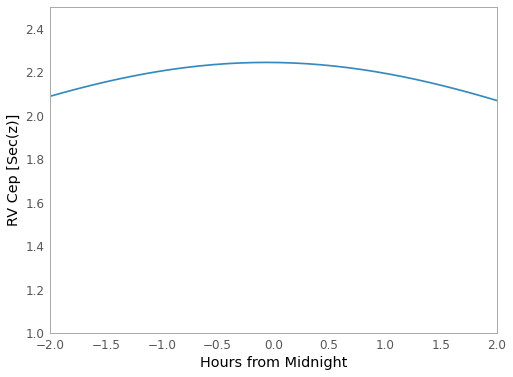

In [31]:
# Following plot shows the position of the RZ Ceph plotted against time
# Change the date depending on observation. Leave the time - it plots it from midnight
midnight = Time('2023-3-6 00:00:00') 
delta_midnight = np.linspace(-2, 10, 100) * u.hour
frame_Mar2night = AltAz(obstime = midnight + delta_midnight, location=bath)
caltaz_Mar2night = caltaz.transform_to(frame_Mar2night)
c_airmass_Mar2night = caltaz_Mar2night.secz
plt.plot(delta_midnight, c_airmass_Mar2night) #co ordinates of cepheid plotted against time RZ CEP
plt.xlim(-2, 2)
plt.ylim(1, 2.5)
plt.xlabel('Hours from Midnight')
plt.ylabel('RV Cep [Sec(z)]')
plt.show()

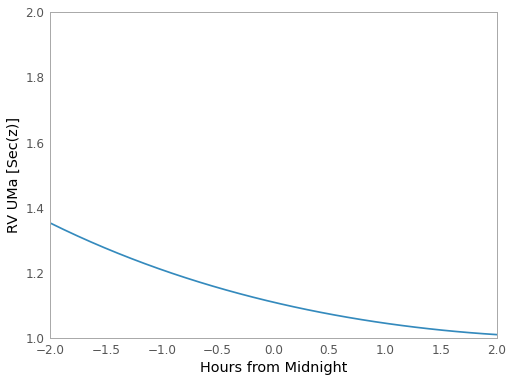

In [32]:
#Same thing for the RV UMa
delta_midnight = np.linspace(-2, 10, 100)*u.hour
frame_Mar2night = AltAz(obstime=midnight+delta_midnight, location=bath)
daltaz_Mar2night = daltaz.transform_to(frame_Mar2night)
d_airmass_Mar2night = daltaz_Mar2night.secz
plt.plot(delta_midnight, d_airmass_Mar2night) #co ordinates of cepheid plotted against time RV UMa
plt.xlim(-2, 2)
plt.ylim(1, 2)
plt.xlabel('Hours from Midnight')
plt.ylabel('RV UMa [Sec(z)]')
plt.show()

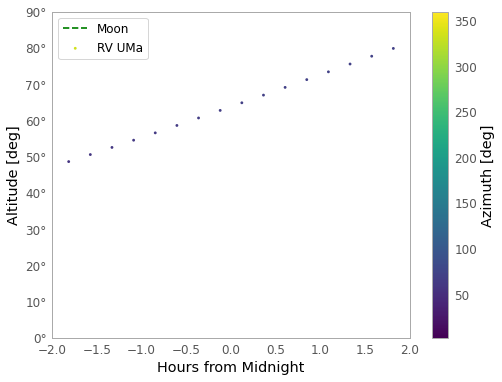

In [33]:
# Now adding the moon to each of these plots - we want to avoid nights where they're close together 
midnight = Time('2023-3-5 00:00:00')
delta_midnight = np.linspace(-12, 12, 100)*u.hour
times = midnight + delta_midnight
moon = get_moon(times)
frame_moon = AltAz(obstime = midnight + delta_midnight, location=bath)
moonaltazs = moon.transform_to(frame_moon)
daltazs = daltaz.transform_to(frame_moon)
caltazs = caltaz.transform_to(frame_moon)
plt.plot(delta_midnight, moonaltazs.az, color='g', ls='--', label='Moon')
plt.scatter(delta_midnight, daltazs.alt, c=daltazs.az, label='RV UMa', lw=0, s=8,
cmap='viridis')
plt.legend(loc='upper left')
plt.colorbar().set_label('Azimuth [deg]')
plt.xlim(-2*u.hour, 2*u.hour)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from Midnight')
plt.ylabel('Altitude [deg]')
plt.show()

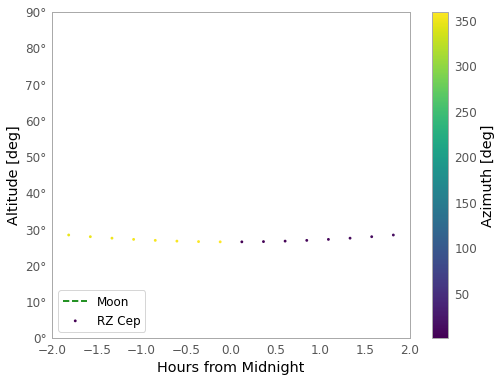

In [34]:
plt.plot(delta_midnight, moonaltazs.az, color='g', ls='--', label='Moon')
plt.scatter(delta_midnight, caltazs.alt, c=caltazs.az, label='RZ Cep', lw=0, s=8,
cmap='viridis')
plt.legend(loc='lower left')
plt.colorbar().set_label('Azimuth [deg]')
plt.xlim(-2*u.hour, 2*u.hour)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from Midnight')
plt.ylabel('Altitude [deg]')
plt.show()

In [35]:
data.to_csv('data.csv')

In [38]:
data["Az"] = pd.to_numeric(data["Az"])

In [43]:
data["Alt"] = pd.to_numeric(data["Alt"])

In [45]:
visibleStars = data.loc[(data['Az'] >= 300) & (data['Az'] <= 400) & (data['Alt'] >= 15) & (data['Alt'] <= 35)]

In [46]:
visibleStars

,oid,Identifier,ra,dec,AltAz,Az,Alt
1,7790,BD+44 156,11.392069,45.613391,319.59 20.2336,319.590,20.2336
2,7791,BD+44 157,11.426887,45.587618,319.553 20.2267,319.553,20.2267
10,7778,BD+45 188,11.088257,45.920216,319.964 20.3612,319.964,20.3612
11,7780,BD+45 197,11.703365,46.180560,319.754 20.8211,319.754,20.8211
27,1577313,GD 10,16.724811,39.515791,312.441 17.617,312.441,17.6170
28,1546045,GD 11,17.346676,37.546105,310.804 16.3271,310.804,16.3271
30,1596611,GD 13,22.427716,42.471698,310.793 22.6024,310.793,22.6024
34,107213,GD 273,16.585078,56.082359,323.92 30.4782,323.920,30.4782
35,83516,GD 275,19.725807,52.453812,319.57 28.977,319.570,28.9770
36,25000,GD 276,20.961030,47.787304,315.431 25.988,315.431,25.9880


In [47]:
visibleStars.to_csv('visibleStars.csv')